# 14. Chart data from SQL DataBase

In [1]:
import pyodbc
import pandas as pd
import matplotlib.pyplot as plt

In [2]:
cnxn = pyodbc.connect("Driver={SQL Server Native Client 11.0};"
                      "Server=BDPRADA.LACAISSE.COM;"
                      "Database=ADA_BETA;"
                      "Trusted_Connection=yes;")

df = pd.read_sql_query('SELECT * FROM [sandbox_analyse_quantitative].[Swaption_v1]',cnxn)

In [3]:
df.vDate = pd.to_datetime(df.vDate)
df.dtypes

RIC                        object
ccy                        object
expiry                     object
tenor                      object
relative_strike            object
vDate              datetime64[ns]
Norm_Vol_JPM              float64
Norm_Vol_TP               float64
Norm_vol_Citi             float64
dtype: object

In [4]:
df.head()

,RIC,ccy,expiry,tenor,relative_strike,vDate,Norm_Vol_JPM,Norm_Vol_TP,Norm_vol_Citi
0,SSSR1USD02Y30Y,USD,02Y,30Y,-100,2002-01-18,105.132832,NaN,NaN
1,SOSWOEUR06M02Y,EUR,06M,02Y,0,2015-08-28,NaN,19.64,19.130048
2,SSSPHEUR01Y05Y,EUR,01Y,05Y,50,2010-04-19,NaN,71.70,78.237724
3,SSSPHEUR01Y02Y,EUR,01Y,02Y,50,2016-05-06,NaN,37.72,37.093097
4,SSSRQUSD01Y05Y,USD,01Y,05Y,-25,2005-08-18,94.887327,NaN,94.376787


In [27]:
USD01M02Y = df.loc[ (df.ccy == 'USD') & (df.expiry == '01M') & (df.tenor == '02Y') & (df.relative_strike == '-100'), : ].copy()
USD01M02Y.sort_values(['vDate'], inplace = True)

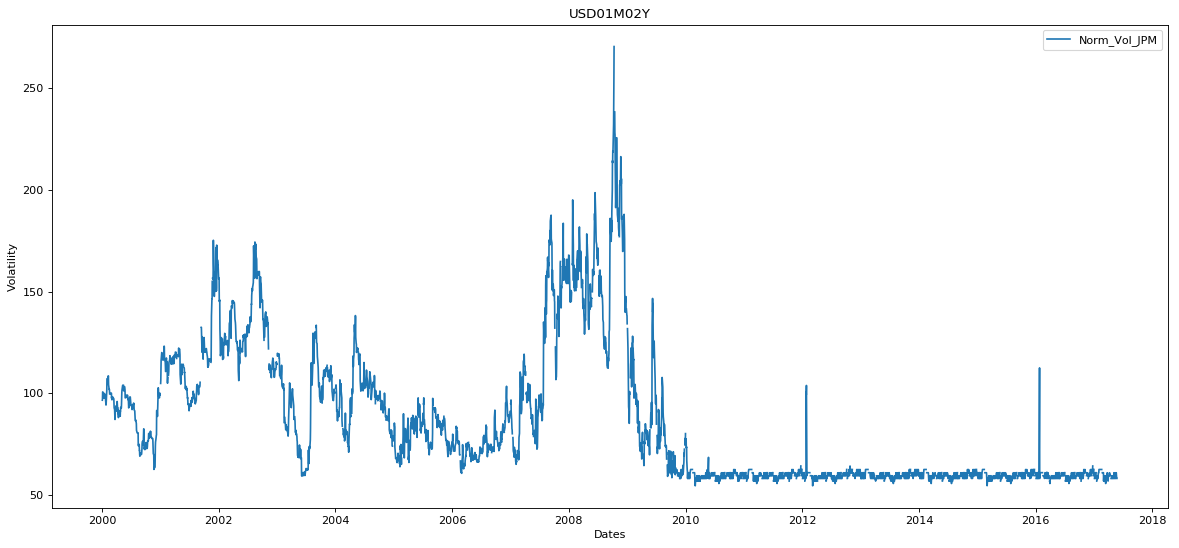

In [40]:
x = USD01M02Y.vDate
y = USD01M02Y.Norm_Vol_JPM

plt.figure(figsize=(18, 8), dpi= 80, facecolor='w', edgecolor='k')

plt.plot(x,y, label = 'Norm_Vol_JPM')
plt.xlabel('Dates')
plt.ylabel('Volatility')

plt.title('USD01M02Y')
plt.legend()
plt.show()